<a href="https://colab.research.google.com/github/KSH-KOR/CodingTestSolutions/blob/main/cnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --no-index -f https://dist.plone.org/thirdparty/ -U PIL
!pip install Pillow
!pip install --upgrade --force-reinstall pillow

Looking in links: https://dist.plone.org/thirdparty/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.5/499.5 KB 12.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4

In [6]:
pip install --ignore-installed Pillow==9.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 50.1 MB/s eta 0:00:00


cnn is greate NN for image classification

what is image?
image is a list of bits with channels

In [4]:
from PIL import Image
from numpy import asarray
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
img = Image.open('school.jpg')

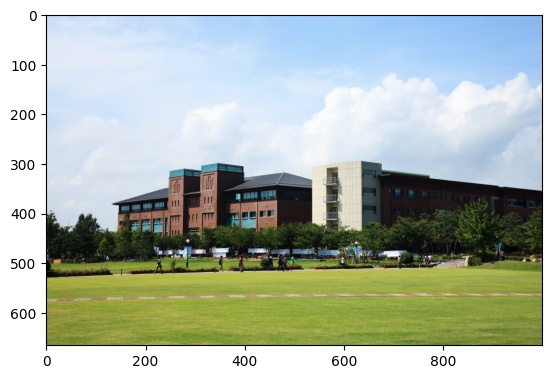

In [8]:
numpydata = asarray(img)
plt.imshow(numpydata)

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [35]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [36]:
x_train = x_train.astype('float32')/255
n=1

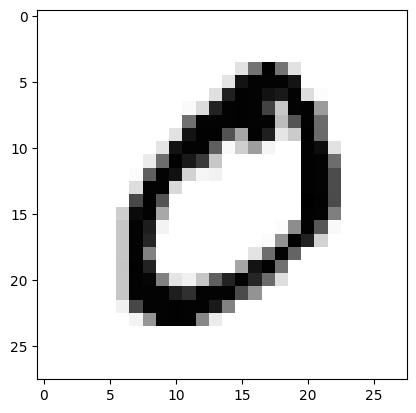

In [37]:
plt.imshow(x_train[n], cmap='Greys', interpolation='nearest')
plt.show()

In [38]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

In [39]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [40]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [41]:
conv = Conv2D(32, kernel_size=(5, 5), strides = (1,1), padding='same', activation='relu', input_shape=input_shape)
maxpooling = MaxPooling2D(pool_size=(2,2), strides=(2,2))
conv2 = Conv2D(64, (2,2), strides = (1,1), padding='same', activation='relu')
maxpooling2 = MaxPooling2D(pool_size=(2,2))


In [42]:
model = Sequential()

In [43]:
model.add(conv)
model.add(maxpooling)
model.add(conv2)
model.add(maxpooling2)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [45]:
batch_size = 128
epochs = 12

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 148s 312ms/step - loss: 0.1907 - accuracy: 0.9418 - val_loss: 5.4425 - val_accuracy: 0.9859
Epoch 2/12
469/469 [==============================] - 118s 251ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 3.9882 - val_accuracy: 0.9898
Epoch 3/12
469/469 [==============================] - 105s 223ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 4.1623 - val_accuracy: 0.9904
Epoch 4/12
469/469 [==============================] - 105s 224ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 4.9241 - val_accuracy: 0.9908
Epoch 5/12
469/469 [==============================] - 102s 218ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 4.9136 - val_accuracy: 0.9901
Epoch 6/12
469/469 [==============================] - 103s 219ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 4.1383 - val_accuracy: 0.9926
Epoch 7/12
469/469 [==============================] - 103s 220ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 3.4028 -

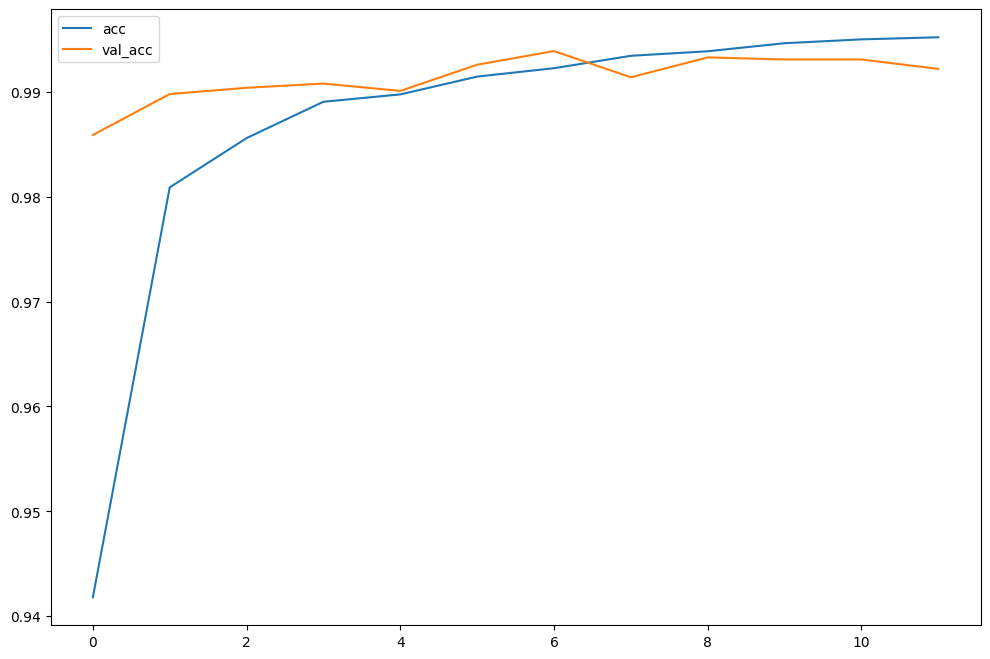

In [47]:
plt.figure(figsize=(12, 8))
show_all = False
if show_all:
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
if show_all:
  plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
else:
  plt.legend(['acc', 'val_acc'])
plt.show()

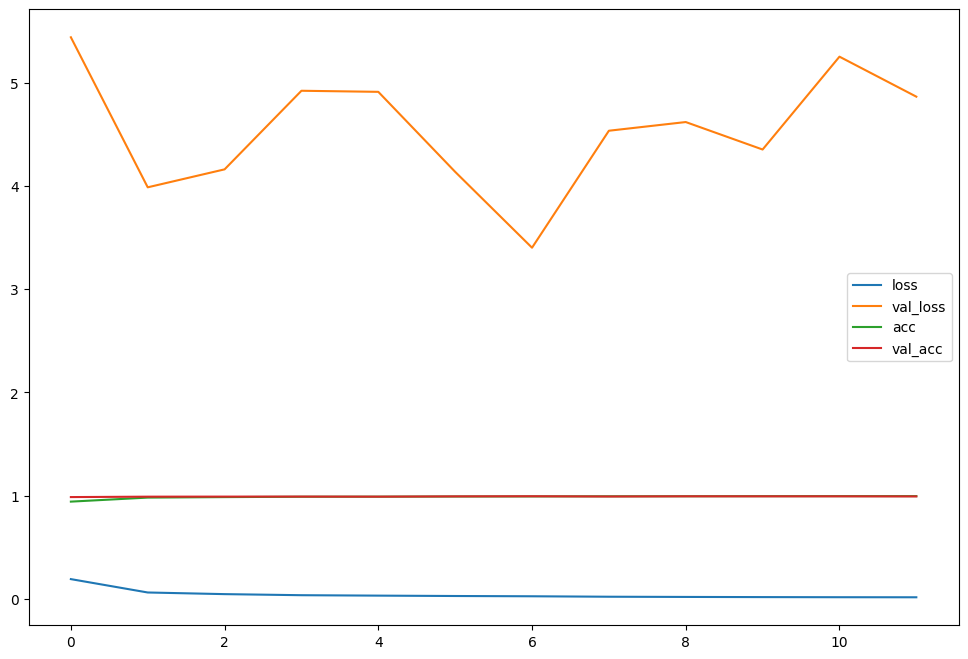

In [48]:
plt.figure(figsize=(12, 8))
show_all = True
if show_all:
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
if show_all:
  plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
else:
  plt.legend(['acc', 'val_acc'])
plt.show()